## Question Type : <br> QUESTION 1: Profiling Customers in a Self-Service Coin Laundry Shop

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns
import math

from datetime import datetime
from boruta import BorutaPy 
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel
import scipy.cluster.hierarchy as shc
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from kmodes.kprototypes import KPrototypes
from apyori import apriori
from sklearn.model_selection import train_test_split

# Dataset

In [ ]:
df_laundry = pd.read_csv('LaundryData.csv')
df_rain = pd.read_csv('Rainfall.csv')

print('df_laundry :', df_laundry.shape)
print('df_rain :', df_rain.shape)

df_laundry : (807, 20)
df_rain : (30684, 5)


In [ ]:
df_laundry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             807 non-null    int64  
 1   Date           807 non-null    object 
 2   Time           807 non-null    object 
 3   Race           797 non-null    object 
 4   Gender         793 non-null    object 
 5   Body_Size      790 non-null    object 
 6   Age_Range      799 non-null    float64
 7   With_Kids      794 non-null    object 
 8   Kids_Category  777 non-null    object 
 9   Basket_Size    801 non-null    object 
 10  Basket_colour  798 non-null    object 
 11  Attire         776 non-null    object 
 12  Shirt_Colour   798 non-null    object 
 13  shirt_type     770 non-null    object 
 14  Pants_Colour   802 non-null    object 
 15  pants_type     798 non-null    object 
 16  Wash_Item      784 non-null    object 
 17  Washer_No      807 non-null    int64  
 18  Dryer_No  

In [ ]:
df_rain.info() #rainfall dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30684 entries, 0 to 30683
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          30684 non-null  object 
 1   Year           30684 non-null  int64  
 2   Month          30684 non-null  int64  
 3   Day            30684 non-null  int64  
 4   Rainfall (mm)  30684 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.2+ MB


In [ ]:
df_laundry.head(5)

,No,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles
0,1,19/10/2015,20:17:50,malay,male,moderate,28.0,yes,young,big,red,casual,blue,short_sleeve,black,short,clothes,3,10,no
1,2,19/10/2015,20:28:42,indian,male,thin,32.0,no,no_kids,big,green,casual,white,short_sleeve,blue_jeans,long,clothes,6,9,no
2,3,19/10/2015,20:58:31,malay,female,moderate,30.0,no,no_kids,big,blue,casual,red,short_sleeve,black,long,clothes,4,10,no
3,4,19/10/2015,21:31:28,indian,male,thin,51.0,no,no_kids,NaN,black,casual,black,short_sleeve,yellow,short,clothes,5,9,no
4,5,19/10/2015,21:40:28,indian,male,moderate,34.0,no,no_kids,big,blue,casual,blue,short_sleeve,white,long,clothes,3,9,no


In [ ]:
df_rain.head(5)

,State,Year,Month,Day,Rainfall (mm)
0,Johor,2014,1,1,5.74
1,Johor,2014,1,2,7.47
2,Johor,2014,1,3,14.33
3,Johor,2014,1,4,32.75
4,Johor,2014,1,5,21.56


# Data Processing

In [ ]:
df_laundry.isnull().sum()

No                0
Date              0
Time              0
Race             10
Gender           14
Body_Size        17
Age_Range         8
With_Kids        13
Kids_Category    30
Basket_Size       6
Basket_colour     9
Attire           31
Shirt_Colour      9
shirt_type       37
Pants_Colour      5
pants_type        9
Wash_Item        23
Washer_No         0
Dryer_No          0
Spectacles        0
dtype: int64

In [ ]:
#https://newbedev.com/python-replace-nan-with-mode-of-column-pandas-code-example

cateogry = df_laundry.select_dtypes(include=['object']).columns.tolist()
#integer = df_laundry.select_dtypes(include=['int64','float64']).columns.tolist()

for i in df_laundry:
    if df_laundry[i].isnull().any():
        if(i in cateogry):
            df_laundry[i] = df_laundry[i].fillna(df_laundry[i].mode()[0])
        else:
            df_laundry[i] = (df_laundry[i].fillna(df_laundry[i].mean())).astype(int)

df_laundry.isnull().sum() 

No               0
Date             0
Time             0
Race             0
Gender           0
Body_Size        0
Age_Range        0
With_Kids        0
Kids_Category    0
Basket_Size      0
Basket_colour    0
Attire           0
Shirt_Colour     0
shirt_type       0
Pants_Colour     0
pants_type       0
Wash_Item        0
Washer_No        0
Dryer_No         0
Spectacles       0
dtype: int64

# Exploratory Data Analysis

## Question 1: Which is the top washer_no and dryer_no used by the customer? 

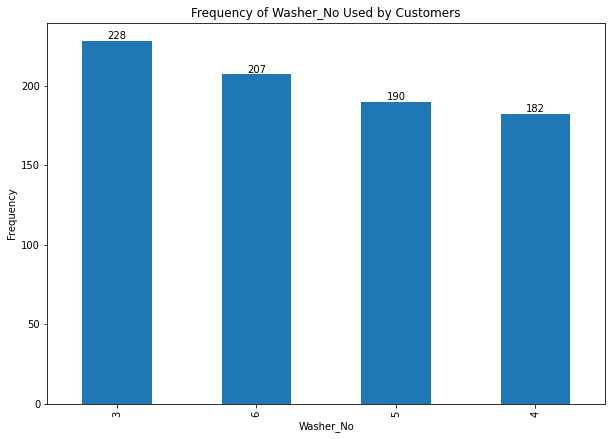

In [ ]:
fig = plt.figure(figsize=(10,7))

b = df_laundry['Washer_No'].value_counts().plot(kind='bar')

#to label the total value for each bar
for p in b.patches:
    	b.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), 
    	ha='center', va='center', xytext=(0, 5), textcoords='offset points')
		 
plt.title('Frequency of Washer_No Used by Customers')
plt.xlabel('Washer_No')
plt.ylabel('Frequency')
plt.show()

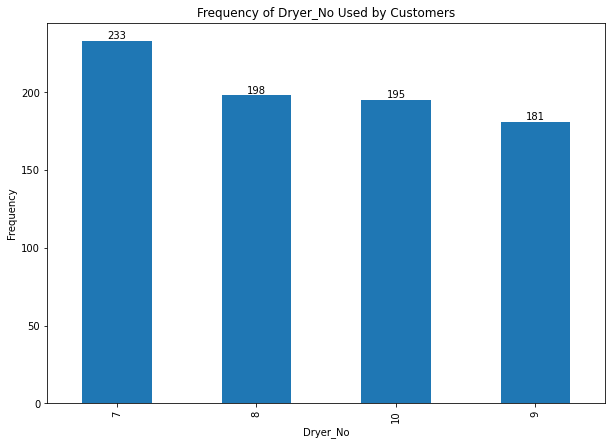

In [ ]:
fig = plt.figure(figsize=(10,7))
b = df_laundry['Dryer_No'].value_counts().plot(kind='bar')

for p in b.patches:
    	b.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), 
    	ha='center', va='center', xytext=(0, 5), textcoords='offset points')
     
plt.title('Frequency of Dryer_No Used by Customers')
plt.xlabel('Dryer_No')
plt.ylabel('Frequency')
plt.show()

**Washer_No 3 appeared as the most popular washer used by the customers with 228 users records. While Dryer_No 7 is the most commonly used dryer among all the dryers with 233 users records.**


## Question 2: When is the most popular period of a day that the customer visited the most?

In [ ]:
#too change the date type
df_laundry['Date'] = pd.to_datetime(df_laundry['Date'], format='%d/%m/%Y') 
df_laundry.head(5)

,No,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles
0,1,2015-10-19,20:17:50,malay,male,moderate,28,yes,young,big,red,casual,blue,short_sleeve,black,short,clothes,3,10,no
1,2,2015-10-19,20:28:42,indian,male,thin,32,no,no_kids,big,green,casual,white,short_sleeve,blue_jeans,long,clothes,6,9,no
2,3,2015-10-19,20:58:31,malay,female,moderate,30,no,no_kids,big,blue,casual,red,short_sleeve,black,long,clothes,4,10,no
3,4,2015-10-19,21:31:28,indian,male,thin,51,no,no_kids,big,black,casual,black,short_sleeve,yellow,short,clothes,5,9,no
4,5,2015-10-19,21:40:28,indian,male,moderate,34,no,no_kids,big,blue,casual,blue,short_sleeve,white,long,clothes,3,9,no


In [ ]:
# change time columns data types
df_laundry['Time'] =  pd.to_datetime(df_laundry['Time']) - pd.to_datetime(df_laundry['Time']).dt.normalize()


In [ ]:
# to get specific hour for each customer vsiting the laundry shop
df_laundry['Hour'] = ""
def get_hour(x):
  seconds = x.seconds
  hours = seconds//3600
  return hours

for i in range(len(df_laundry['Time'])):
  df_laundry['Hour'][i] = get_hour(df_laundry['Time'][i])

df_laundry['Hour']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0      20
1      20
2      20
3      21
4      21
       ..
802    20
803    20
804    20
805    20
806    20
Name: Hour, Length: 807, dtype: object

In [ ]:
# 
df_laundry['parts_of_day'] = pd.cut(df_laundry['Hour'], bins = [-1,12,18,24], labels = ['Morning','Afternoon','Evening'])
df_laundry

,No,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,Hour,parts_of_day
0,1,2015-10-19,0 days 20:17:50,malay,male,moderate,28,yes,young,big,red,casual,blue,short_sleeve,black,short,clothes,3,10,no,20,Evening
1,2,2015-10-19,0 days 20:28:42,indian,male,thin,32,no,no_kids,big,green,casual,white,short_sleeve,blue_jeans,long,clothes,6,9,no,20,Evening
2,3,2015-10-19,0 days 20:58:31,malay,female,moderate,30,no,no_kids,big,blue,casual,red,short_sleeve,black,long,clothes,4,10,no,20,Evening
3,4,2015-10-19,0 days 21:31:28,indian,male,thin,51,no,no_kids,big,black,casual,black,short_sleeve,yellow,short,clothes,5,9,no,21,Evening
4,5,2015-10-19,0 days 21:40:28,indian,male,moderate,34,no,no_kids,big,blue,casual,blue,short_sleeve,white,long,clothes,3,9,no,21,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,803,2015-12-09,0 days 20:05:46,malay,female,moderate,45,no,no_kids,small,white,casual,red,long sleeve,black,long,clothes,3,10,no,20,Evening
803,804,2015-12-09,0 days 20:33:01,malay,male,fat,34,no,no_kids,big,grey,casual,white,short_sleeve,black,long,blankets,3,7,no,20,Evening
804,805,2015-12-09,0 days 20:37:01,malay,female,moderate,53,no,no_kids,big,purple,traditional,pink,long sleeve,pink,long,clothes,3,7,yes,20,Evening
805,806,2015-12-09,0 days 20:42:57,indian,female,moderate,37,no,no_kids,big,green,traditional,brown,short_sleeve,black,long,clothes,6,10,no,20,Evening


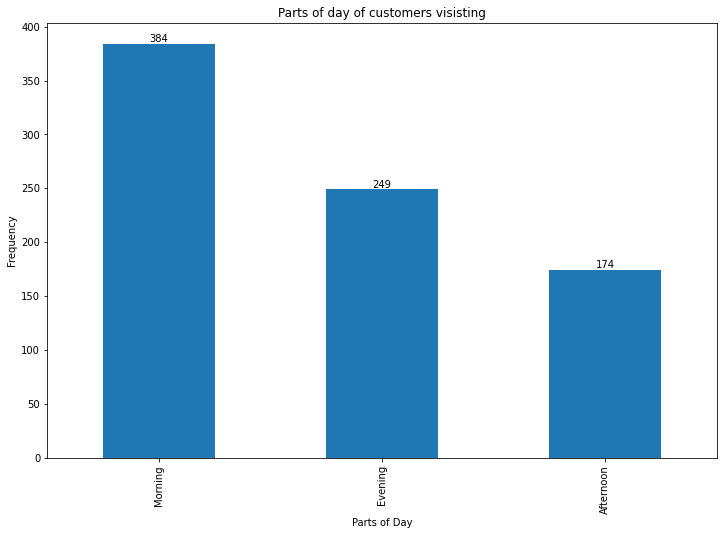

In [ ]:
#can use plotly
fig = plt.figure(figsize=(12,8))
b = df_laundry['parts_of_day'].value_counts().plot(kind='bar')

for p in b.patches:
    	b.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), 
    	ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Parts of day of customers visisting')
plt.xlabel('Parts of Day')
plt.ylabel('Frequency')
plt.show()

**We have splitted the dataset into morning (00:00 - 11:59), afternoon (12:00 - 17:59) and evening (18:00 - 23.59), then the result is shown in the plots above.**

## Question 3: Which day in a week has the highest sales based on the number of customers?

In [ ]:
df_day = df_laundry.copy()
df_day = df_day[['Date','Race']]
df_day = df_day.groupby(['Date']).count()
df_day = df_day.rename(columns={'Race': 'Number_Customers'})
df_day['Date'] = df_day.index
df_day['Date'] = df_day.Date.astype(str)
df_day

,Number_Customers,Date
Date,,
2015-10-19,7,2015-10-19
2015-10-20,60,2015-10-20
2015-10-21,25,2015-10-21
2015-10-22,20,2015-10-22
2015-10-23,34,2015-10-23
2015-10-24,55,2015-10-24
2015-10-25,6,2015-10-25
2015-10-26,5,2015-10-26
2015-10-29,9,2015-10-29


In [ ]:
list_day = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun','Mon','Thu','Fri',
            'Sun','Mon','Tue','Wed','Thu','Fri','Sun','Mon','Tue','Wed',
            'Fri','Sat','Sun','Wed']

df_day.insert(2,'Day',list_day)
df_day.reset_index(drop=True, inplace=True)
df_day = df_day.rename(columns={'Number_Customers': 'Total_Number_Customers'})
df_day

,Total_Number_Customers,Date,Day
0,7,2015-10-19,Mon
1,60,2015-10-20,Tue
2,25,2015-10-21,Wed
3,20,2015-10-22,Thu
4,34,2015-10-23,Fri
5,55,2015-10-24,Sat
6,6,2015-10-25,Sun
7,5,2015-10-26,Mon
8,9,2015-10-29,Thu
9,1,2015-10-30,Fri


In [ ]:
df_day1 = df_day[['Day','Total_Number_Customers']]
df_day1 = df_day1.groupby('Day').agg({'Total_Number_Customers': ['sum']})

df_day1['Days'] = df_day1.index
df_day1['New_Number_Customers'] =df_day1['Total_Number_Customers']
df_day1.reset_index(drop=True, inplace=True)
df_day1.drop(columns=['Total_Number_Customers'],inplace=True)

df_day1

,Days,New_Number_Customers
,,
0,Fri,155
1,Mon,66
2,Sat,175
3,Sun,173
4,Thu,33
5,Tue,121
6,Wed,84


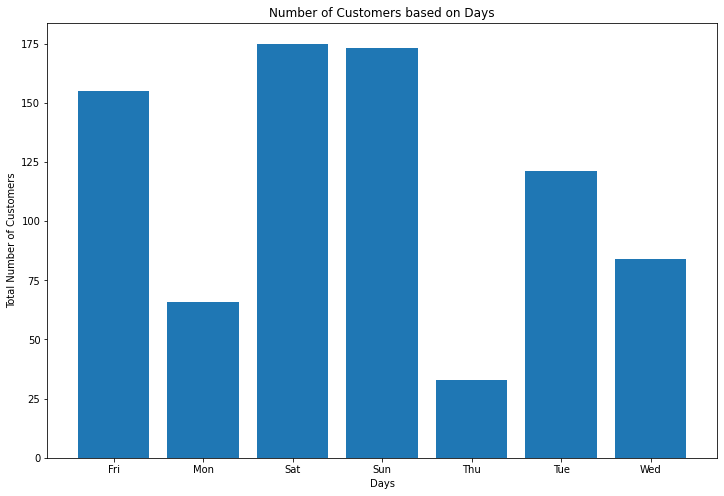

In [ ]:
fig = plt.figure(figsize=(12,8))
plt.bar(df_day1['Days'], df_day1['New_Number_Customers'], align='center')
plt.xticks(df_day1['Days'])
plt.xlabel('Days')
plt.ylabel('Total Number of Customers')
plt.title('Number of Customers based on Days')
plt.show()

**We have manually tagged the day in a week for the dates in the dataset given. The days of the week are separated as Monday, Tuesday, Wednesday, Thursday, Friday, Saturday and Sunday. The bar charts above show the total amount of customers visiting the laundry shop in different days.**

## Question 4: What are the peak hours that customers visit the self-service laundry shop?

In [ ]:
df8 = df_laundry.copy()
df8['Date'] = df8.Date.astype(str)
df8 = df8.merge(df_day,left_on='Date', right_on='Date')
df8

,No,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,Hour,parts_of_day,Total_Number_Customers,Day
0,1,2015-10-19,0 days 20:17:50,malay,male,moderate,28,yes,young,big,red,casual,blue,short_sleeve,black,short,clothes,3,10,no,20,Evening,7,Mon
1,2,2015-10-19,0 days 20:28:42,indian,male,thin,32,no,no_kids,big,green,casual,white,short_sleeve,blue_jeans,long,clothes,6,9,no,20,Evening,7,Mon
2,3,2015-10-19,0 days 20:58:31,malay,female,moderate,30,no,no_kids,big,blue,casual,red,short_sleeve,black,long,clothes,4,10,no,20,Evening,7,Mon
3,4,2015-10-19,0 days 21:31:28,indian,male,thin,51,no,no_kids,big,black,casual,black,short_sleeve,yellow,short,clothes,5,9,no,21,Evening,7,Mon
4,5,2015-10-19,0 days 21:40:28,indian,male,moderate,34,no,no_kids,big,blue,casual,blue,short_sleeve,white,long,clothes,3,9,no,21,Evening,7,Mon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,803,2015-12-09,0 days 20:05:46,malay,female,moderate,45,no,no_kids,small,white,casual,red,long sleeve,black,long,clothes,3,10,no,20,Evening,17,Wed
803,804,2015-12-09,0 days 20:33:01,malay,male,fat,34,no,no_kids,big,grey,casual,white,short_sleeve,black,long,blankets,3,7,no,20,Evening,17,Wed
804,805,2015-12-09,0 days 20:37:01,malay,female,moderate,53,no,no_kids,big,purple,traditional,pink,long sleeve,pink,long,clothes,3,7,yes,20,Evening,17,Wed
805,806,2015-12-09,0 days 20:42:57,indian,female,moderate,37,no,no_kids,big,green,traditional,brown,short_sleeve,black,long,clothes,6,10,no,20,Evening,17,Wed


In [ ]:
q8 = df8.groupby(['Date','Hour']).count()
q8 = q8.reset_index()
q8

,Date,Hour,No,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,parts_of_day,Total_Number_Customers,Day
0,2015-10-19,20,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,2015-10-19,21,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2,2015-10-19,23,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,2015-10-20,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,2015-10-20,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,2015-12-09,16,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
209,2015-12-09,17,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
210,2015-12-09,18,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
211,2015-12-09,19,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
fig = plt.figure(figsize=(12,8))
q8b = q8[['Date','Hour','Total_Number_Customers']]
q8b = q8b.rename(columns={'Total_Number_Customers': 'Number_Customers'})
q8b

,Date,Hour,Number_Customers
0,2015-10-19,20,3
1,2015-10-19,21,2
2,2015-10-19,23,2
3,2015-10-20,0,3
4,2015-10-20,1,1
...,...,...,...
208,2015-12-09,16,2
209,2015-12-09,17,4
210,2015-12-09,18,1
211,2015-12-09,19,1


<Figure size 864x576 with 0 Axes>

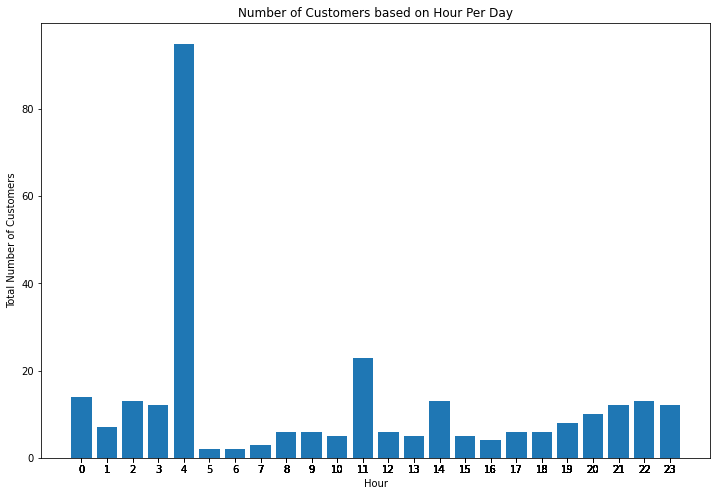

In [ ]:
fig = plt.figure(figsize=(12,8))
plt.bar(q8b['Hour'], q8b['Number_Customers'], align='center')
plt.xticks(q8b['Hour'])
plt.xlabel('Hour')
plt.ylabel('Total Number of Customers')
plt.title('Number of Customers based on Hour Per Day')
plt.show()

**We have plotted a bar chart on counting the total number of customer visitng the laundry shop based on 24 hours in a day.**

## Question 5: What is the distribution of gender based on customer race?

Text(0, 0.5, 'Number of Customer')

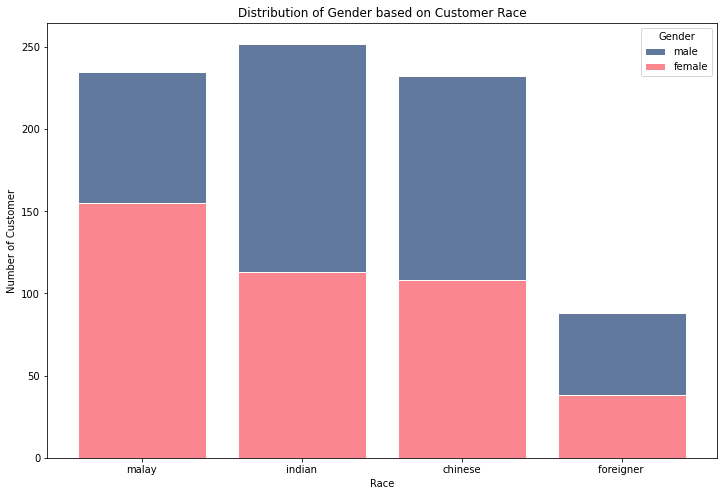

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.histplot(
    df_laundry,
    x='Race',
    hue='Gender',
    multiple='stack',
    palette=['#2f4b7c', '#f95d6a'],
    # Add white borders to the bars.
    edgecolor='white',
    # Shrink the bars a bit so they don't touch.
    shrink=0.8
)

ax.set_title('Distribution of Gender based on Customer Race')
ax.set_ylabel('Number of Customer')

**We have plotted a bar graph based on the distribution on races. We have also splitted the races based on gender to see if there is any extraordinary cases appear.**

## Question 6: What is the distribution of the basket size based on basket colour? 

Text(0, 0.5, 'Number of Customer')

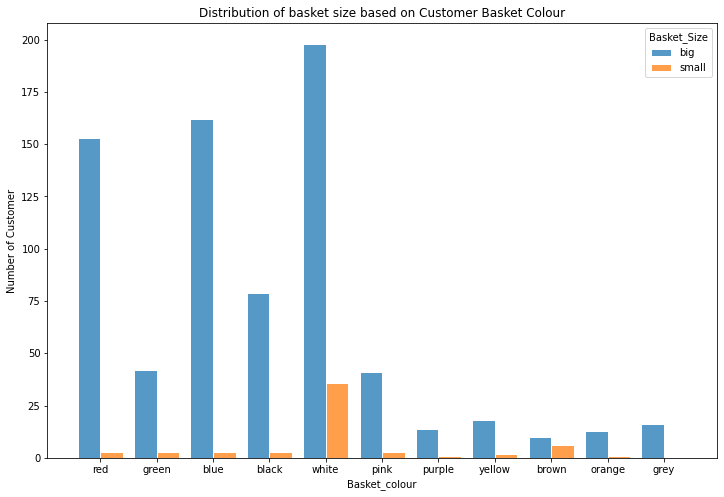

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.histplot(
    df_laundry,
    x='Basket_colour',
    hue='Basket_Size',
    multiple='dodge',
    #palette=['#2f4b7c', '#f95d6a'],
    # Add white borders to the bars.
    edgecolor='white',
    # Shrink the bars a bit so they don't touch.
    shrink=0.8
)

ax.set_title('Distribution of basket size based on Customer Basket Colour')
ax.set_ylabel('Number of Customer')

**Due to the 'basket size' attribute is the class for prediction for the classification model, we checked the distribution of the basket size by using the bar graph. The result is shown in the bar graph plotted.**

# Association Rule Mining

## Question 7: Which washer and dryer were often used together?

In [ ]:
df3 = df_laundry[['Washer_No',	'Dryer_No']]
records = []
for i in range(0, 807):
    records.append([str(df3.values[i,j]) for j in range(0, 2)])
records

[['3', '10'],
 ['6', '9'],
 ['4', '10'],
 ['5', '9'],
 ['3', '9'],
 ['4', '8'],
 ['5', '10'],
 ['3', '9'],
 ['6', '10'],
 ['5', '7'],
 ['4', '8'],
 ['4', '8'],
 ['3', '7'],
 ['3', '9'],
 ['3', '8'],
 ['5', '9'],
 ['4', '7'],
 ['5', '9'],
 ['6', '7'],
 ['5', '10'],
 ['3', '10'],
 ['5', '9'],
 ['3', '7'],
 ['3', '7'],
 ['5', '7'],
 ['3', '8'],
 ['6', '9'],
 ['5', '9'],
 ['4', '10'],
 ['6', '9'],
 ['3', '7'],
 ['5', '9'],
 ['3', '8'],
 ['3', '7'],
 ['4', '7'],
 ['6', '10'],
 ['4', '7'],
 ['5', '9'],
 ['5', '10'],
 ['4', '9'],
 ['5', '9'],
 ['4', '8'],
 ['4', '10'],
 ['6', '9'],
 ['3', '7'],
 ['6', '8'],
 ['5', '7'],
 ['3', '9'],
 ['4', '8'],
 ['5', '10'],
 ['5', '9'],
 ['5', '7'],
 ['3', '9'],
 ['3', '8'],
 ['6', '7'],
 ['6', '8'],
 ['3', '10'],
 ['6', '10'],
 ['5', '8'],
 ['3', '8'],
 ['3', '9'],
 ['4', '10'],
 ['3', '9'],
 ['5', '10'],
 ['6', '10'],
 ['4', '8'],
 ['3', '7'],
 ['6', '7'],
 ['4', '8'],
 ['3', '7'],
 ['3', '8'],
 ['4', '8'],
 ['5', '8'],
 ['3', '9'],
 ['5', '8'],
 ['5', '1

In [ ]:
association_rules = apriori(records, min_support = 0.1, min_confidence=0.3, min_lift=1, min_length=2)
association_results = list(association_rules)
association_results

[RelationRecord(items=frozenset({'3', '7'}), support=0.11152416356877323, ordered_statistics=[OrderedStatistic(items_base=frozenset({'3'}), items_add=frozenset({'7'}), confidence=0.3947368421052631, lift=1.3671786763044949), OrderedStatistic(items_base=frozenset({'7'}), items_add=frozenset({'3'}), confidence=0.38626609442060084, lift=1.3671786763044949)])]

In [ ]:
cnt =0

for item in association_results:
    cnt += 1
    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("(Rule " + str(cnt) + ") " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(round(item[1],3)))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(round(item[2][0][2],4)))
    print("Lift: " + str(round(item[2][0][3],4)))
    print("=====================================")

# support = (3 and 7)/all
# confidence = in 3 how many got 7
# life = support / confidence (more than 1 better)

(Rule 1) 3 -> 7
Support: 0.112
Confidence: 0.3947
Lift: 1.3672


**We have used apriori algorithm to find the association rule between washer and dryer used since the 2 attributes are the only items that the customer has paid to use in the dataset.**

# Correlation Matrix

## Question 8: Did daily rainfall information impact the sales of the laundry shop?

In [ ]:
rain = df_rain.copy()
df6 = df_laundry.copy()
df6 = df6[['Date','Race']]
df6 = df6.groupby(['Date']).count() #group all date together and count number of customer per day
df6 = df6.rename(columns={'Race': 'Total_Number_Customers'}) #rename
df6['Date'] = df6.index
df6['Date'] = df6.Date.astype(str)

alt.Chart(df6).mark_bar().encode(
    x='Date',
    y='Number_Customers'
    
).properties(width=700,height=600)

condition = (rain['State']=='Selangor') #get whether status from rainfall dataset
rain = rain[condition]

rain['Date'] = pd.Series()
rain['Year'] = rain.Year.astype(str)
rain['Month']= rain.Month.astype(str)
rain['Day'] = rain.Day.astype(str)
list_m = ['1','2','3','4','5','6','7','8','9'] 

### to add 0 for all single digit month number ###
for i in range(len(rain)):
  if rain['Day'].iloc[i] in list_m:
    rain['Date'].iloc[i] = rain['Year'].iloc[i] + "-" + rain['Month'].iloc[i] + "-0" + rain['Day'].iloc[i]
  else:
    rain['Date'].iloc[i] = rain['Year'].iloc[i] + "-" + rain['Month'].iloc[i] + "-" + rain['Day'].iloc[i]

df6.reset_index(drop=True, inplace=True)

rain2 = df6.merge(rain,left_on='Date', right_on='Date')
rain2.drop(columns=['Year','Month','Day'],inplace=True)

### to seperate the rainfall type ###
rain2['Rain Type']=pd.Series()
for i in range (len(rain2['Date'])):
  if rain2['Rainfall (mm)'][i] < 10.00:
    rain2['Rain Type'][i] = 'Light rain'

  elif rain2['Rainfall (mm)'][i] > 10.00 and rain2['Rainfall (mm)'][i] < 25.00:
    rain2['Rain Type'][i] = 'Moderate rain'

  elif rain2['Rainfall (mm)'][i] > 25.00 and rain2['Rainfall (mm)'][i] < 50.00:
    rain2['Rain Type'][i] = 'Heavy rain'

  else:
    rain2['Rain Type'][i] = 'Rainstorm'

rain2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,Total_Number_Customers,Date,State,Rainfall (mm),Rain Type
0,7,2015-10-19,Selangor,9.67,Light rain
1,60,2015-10-20,Selangor,6.42,Light rain
2,25,2015-10-21,Selangor,8.96,Light rain
3,20,2015-10-22,Selangor,9.15,Light rain
4,34,2015-10-23,Selangor,5.85,Light rain
5,55,2015-10-24,Selangor,2.36,Light rain
6,6,2015-10-25,Selangor,2.86,Light rain
7,5,2015-10-26,Selangor,3.41,Light rain
8,9,2015-10-29,Selangor,2.41,Light rain
9,1,2015-10-30,Selangor,4.03,Light rain


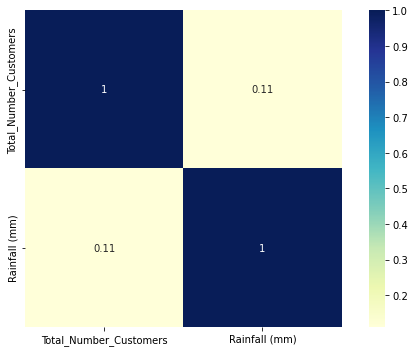

In [ ]:
rain3 = rain2.copy()
#rain3.drop(columns=['Rainfall (mm)'],inplace=True)

fig = plt.figure(figsize =(8, 5))
coor_matrix = rain3.corr()
heatmap = sns.heatmap(coor_matrix ,annot = True, square = True, cmap='YlGnBu')
plt.tight_layout()

**We have used correlation matrix to find the relation between the rainfall data found online and the total number customer per day. The result is shown by the correlation matrix above. **

##Question 9: What kind of relationships are there between all the attributes?

In [ ]:
df5 = df_laundry.copy()

### range the customer ages ###
df5['New_Age_Range'] = pd.cut(df_laundry['Age_Range'],bins=[10,20,30,40,50,60,70])
df5['Date'] = df5.Date.astype(str)

### merge the days and age range to rainfall dataset ###
df5 = df5.merge(rain2,left_on='Date', right_on='Date')
df5['parts_of_day'] = df5.parts_of_day.astype(str)
df5['New_Age_Range'] = df5.New_Age_Range.astype(str)
df_day['Date'] = df_day.Date.astype(str)

### merge df_day with laundry dataset ###
df5 = df5.merge(df_day,left_on='Date', right_on='Date')
df5.drop(columns=['Total_Number_Customers_y'],inplace=True) ### drop unncessary attributes to do label encode
df5 = pd.merge(q8b,df5,on=['Date','Hour'],how='outer') ### merge the hour of customers visting laundry shop
df5c = df5.copy()
df5c.drop(columns=['No','Date','Time','Age_Range','Hour', 'Rainfall (mm)', 'State'],inplace=True) ### drop unncessary attributes to do label encode
df5b = df5c.copy() 

### label encode ###
le = LabelEncoder()

for col in df5b.columns:
  if df5b[col].dtypes == object:
    df5b[col] = le.fit_transform(df5b[col])

df5b

,Number_Customers,Race,Gender,Body_Size,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,parts_of_day,New_Age_Range,Total_Number_Customers_x,Rain Type,Day
0,3,3,1,1,1,4,0,8,0,2,1,0,1,1,3,10,0,1,0,7,1,1
1,3,2,1,2,0,1,0,3,0,10,1,5,0,1,6,9,0,1,1,7,1,1
2,3,3,0,1,0,1,0,1,0,9,1,0,0,1,4,10,0,1,0,7,1,1
3,2,2,1,2,0,1,0,0,0,0,1,14,1,1,5,9,0,1,3,7,1,1
4,2,2,1,1,0,1,0,1,0,2,1,13,0,1,3,9,0,1,1,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,6,3,0,1,0,1,1,9,0,9,0,0,0,1,3,10,0,1,2,17,1,6
803,6,3,1,0,0,1,0,4,0,10,1,0,0,0,3,7,0,1,1,17,1,6
804,6,3,0,1,0,1,0,7,2,7,0,10,0,1,3,7,1,1,3,17,1,6
805,6,2,0,1,0,1,0,3,2,3,1,0,0,1,6,10,0,1,1,17,1,6


In [ ]:
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

rows= []

for var1 in df5b:
  col = []
  for var2 in df5b:
    cramers =cramers_V(df5b[var1], df5b[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = df5b.columns, index = df5b.columns)
df

,Number_Customers,Race,Gender,Body_Size,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,parts_of_day,New_Age_Range,Total_Number_Customers_x,Rain Type,Day
Number_Customers,1.00,0.04,0.05,0.03,0.09,0.04,0.01,0.02,0.05,0.02,0.03,0.02,0.11,0.08,0.01,0.01,0.02,0.21,0.01,0.20,0.49,0.20
Race,0.04,1.00,0.04,0.01,0.02,0.02,0.01,0.02,0.02,0.03,0.13,0.03,0.11,0.00,0.00,0.00,0.04,0.01,0.00,0.10,0.03,0.04
Gender,0.05,0.04,1.00,0.01,0.04,0.04,0.00,0.02,0.05,0.06,0.08,0.11,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.03,0.00,0.01
Body_Size,0.03,0.01,0.01,1.00,0.00,0.02,0.00,0.02,0.02,0.04,0.01,0.04,0.01,0.00,0.02,0.01,0.00,0.00,0.00,0.06,0.01,0.03
With_Kids,0.09,0.02,0.04,0.00,0.99,0.96,0.00,0.03,0.01,0.04,0.00,0.06,0.00,0.02,0.00,0.00,0.00,0.02,0.00,0.09,0.03,0.05
Kids_Category,0.04,0.02,0.04,0.02,0.96,1.00,0.01,0.02,0.03,0.03,0.01,0.04,0.01,0.04,0.01,0.00,0.00,0.01,0.01,0.04,0.02,0.02
Basket_Size,0.01,0.01,0.00,0.00,0.00,0.01,0.98,0.07,0.03,0.04,0.00,0.05,0.00,0.01,0.01,0.01,0.00,0.01,0.00,0.08,0.00,0.03
Basket_colour,0.02,0.02,0.02,0.02,0.03,0.02,0.07,1.00,0.02,0.03,0.02,0.03,0.03,0.03,0.02,0.02,0.03,0.02,0.01,0.04,0.02,0.02
Attire,0.05,0.02,0.05,0.02,0.01,0.03,0.03,0.02,1.00,0.06,0.11,0.07,0.04,0.00,0.01,0.00,0.01,0.01,0.00,0.07,0.04,0.03
Shirt_Colour,0.02,0.03,0.06,0.04,0.04,0.03,0.04,0.03,0.06,1.00,0.08,0.05,0.04,0.02,0.02,0.02,0.02,0.02,0.01,0.03,0.04,0.02


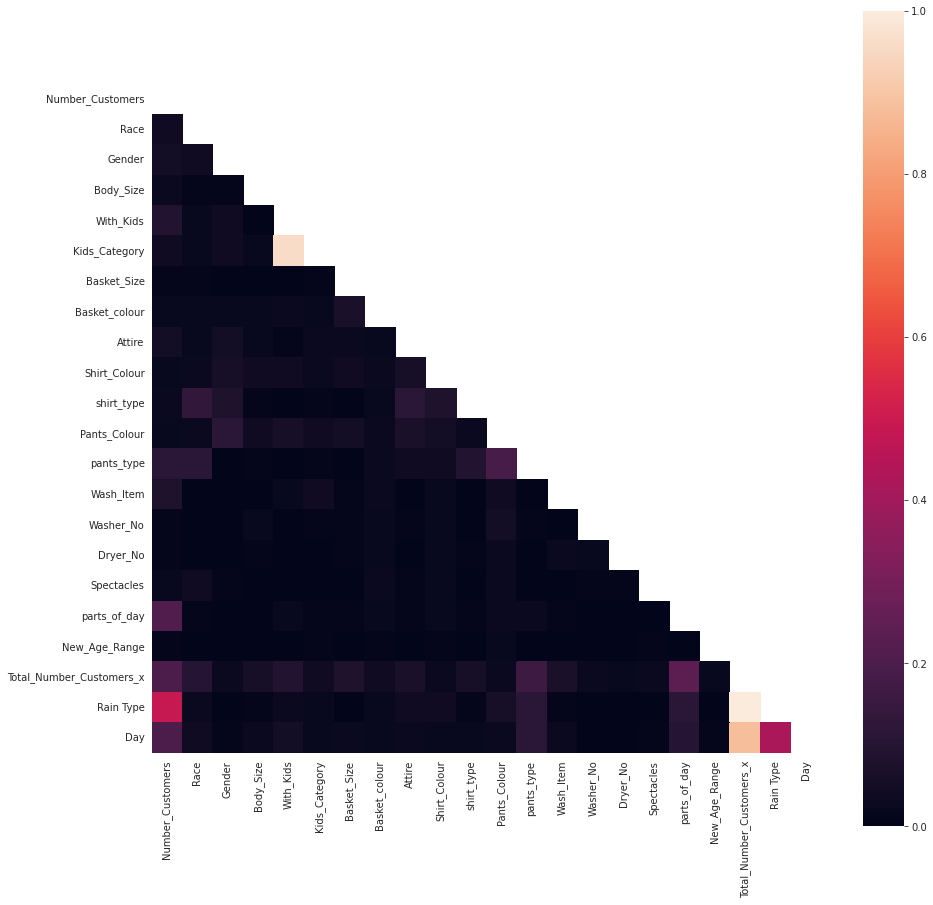

In [ ]:
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig = plt.figure(figsize =(15, 15))
with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True)

plt.show()

**By merging all the data available, we used cramer's V to find the correlation between all the attributes of the dataset. The result of the correlation matrix produced is shown in the graph above.**

# Feature Selection (Boruta)

## Question 10: What are the Top-10 and Bottom-10 features based on ‘parts_of_day’ attributes?

In [ ]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [ ]:
qf7 = df5b.copy()
qf7

,Number_Customers,Race,Gender,Body_Size,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,parts_of_day,New_Age_Range,Total_Number_Customers_x,Rain Type,Day
0,3,3,1,1,1,4,0,8,0,2,1,0,1,1,3,10,0,1,0,7,1,1
1,3,2,1,2,0,1,0,3,0,10,1,5,0,1,6,9,0,1,1,7,1,1
2,3,3,0,1,0,1,0,1,0,9,1,0,0,1,4,10,0,1,0,7,1,1
3,2,2,1,2,0,1,0,0,0,0,1,14,1,1,5,9,0,1,3,7,1,1
4,2,2,1,1,0,1,0,1,0,2,1,13,0,1,3,9,0,1,1,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,6,3,0,1,0,1,1,9,0,9,0,0,0,1,3,10,0,1,2,17,1,6
803,6,3,1,0,0,1,0,4,0,10,1,0,0,0,3,7,0,1,1,17,1,6
804,6,3,0,1,0,1,0,7,2,7,0,10,0,1,3,7,1,1,3,17,1,6
805,6,2,0,1,0,1,0,3,2,3,1,0,0,1,6,10,0,1,1,17,1,6


### Feature Selection (parts_of_day)

In [ ]:
y = qf7['parts_of_day']
X = qf7.drop(columns=['parts_of_day'])
colnames = X.columns

rfr = RandomForestClassifier(max_depth=2, random_state=0)
feat_selector = BorutaPy(rfr, n_estimators="auto", random_state=1)
feat_selector.fit(X.values, y.values.ravel())

BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight=None, criterion='gini',
                                          max_depth=2, max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=234, n_jobs=None,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x7F4D19361D10,
                                          verbose=0, warm_start=False),
         max_iter=100, n_estimators='a

In [ ]:
boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()),columns=['Features','Score'])
boruta_score = boruta_score.sort_values("Score", ascending=False)

In [ ]:
print('---------Top 10----------')
display(boruta_score.head(10))

print('---------Bottom 10----------')
boruta_score.tail(10)

---------Top 10----------


,Features,Score
0,Number_Customers,1.00
1,Race,1.00
19,Rain Type,1.00
18,Total_Number_Customers_x,1.00
12,pants_type,1.00
11,Pants_Colour,1.00
20,Day,1.00
5,Kids_Category,1.00
9,Shirt_Colour,0.92
4,With_Kids,0.92


---------Bottom 10----------


,Features,Score
8,Attire,0.75
10,shirt_type,0.67
13,Wash_Item,0.58
14,Washer_No,0.50
6,Basket_Size,0.42
3,Body_Size,0.33
17,New_Age_Range,0.25
15,Dryer_No,0.17
2,Gender,0.08
16,Spectacles,0.00


Text(0.5, 1.0, 'Boruta Top 20 Features')

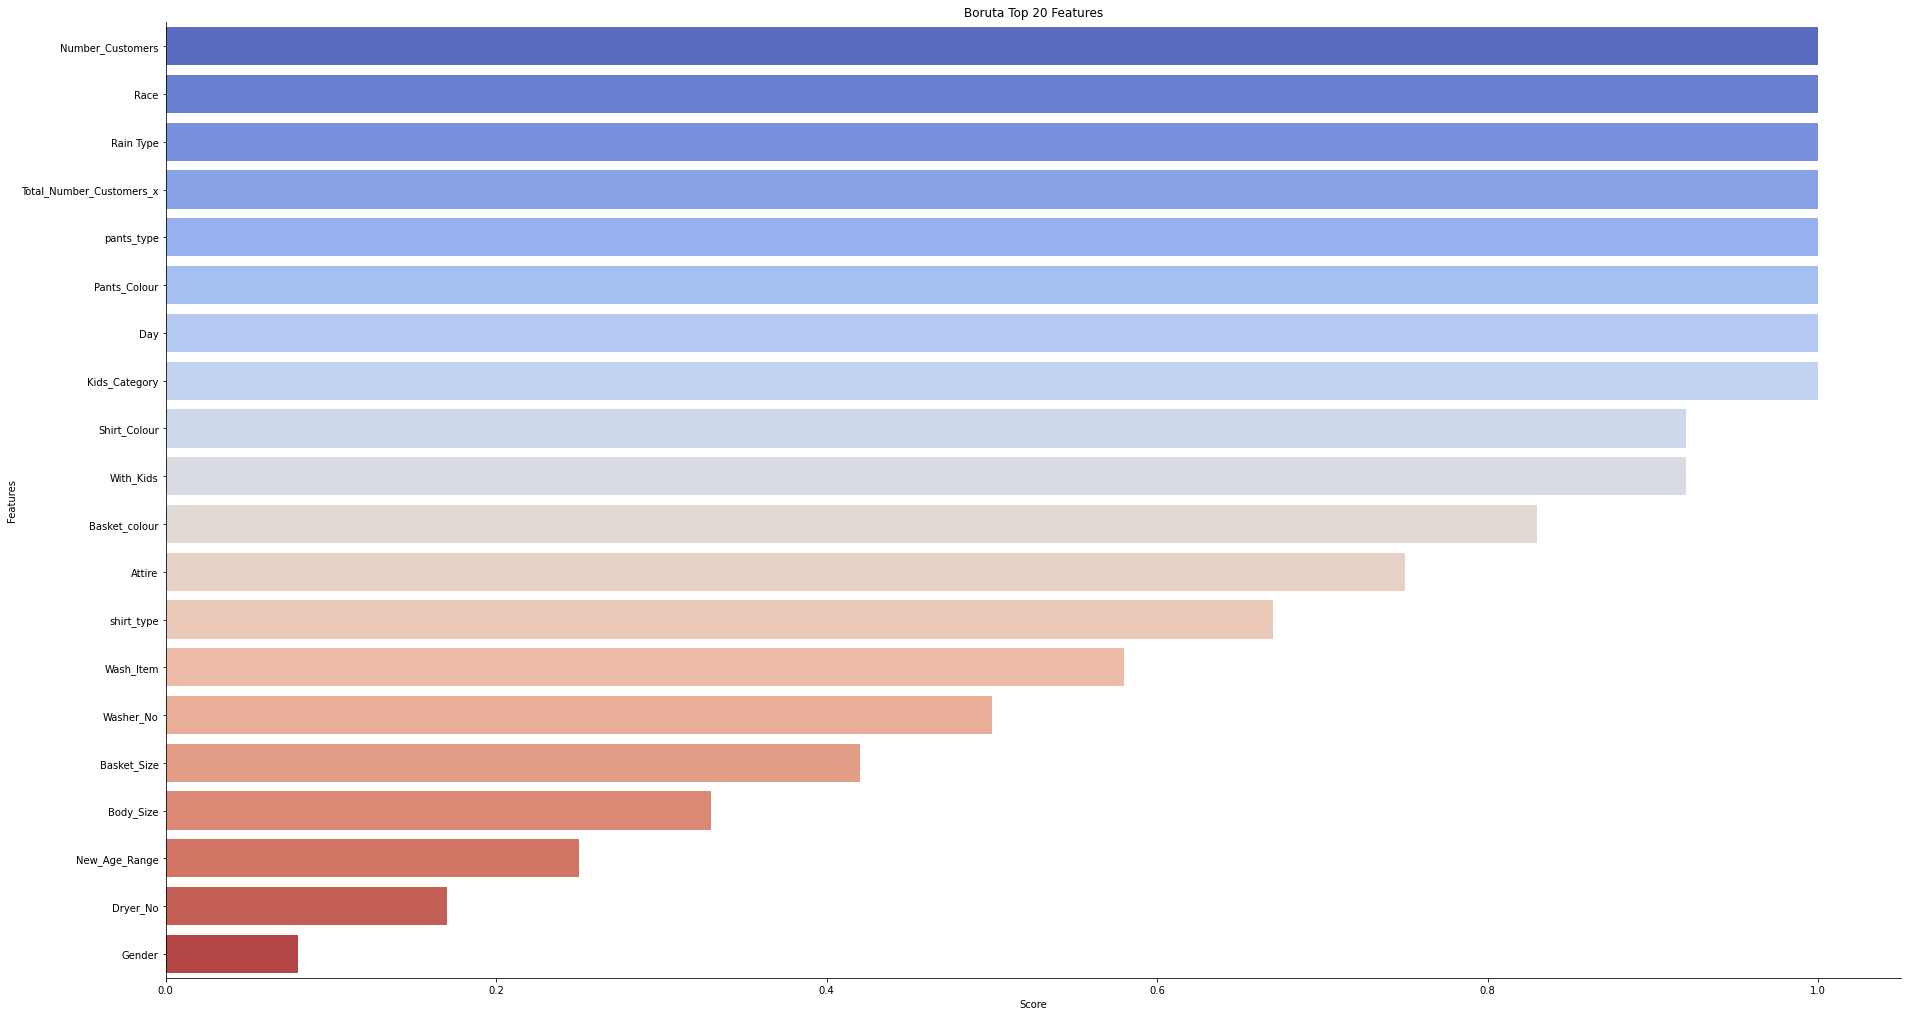

In [ ]:
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[0:20], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("Boruta Top 20 Features")

**Boruta feature selection have been applied to the dataset to find the best on predicting the parts of day of the customer visiting the laundry shops. The bar chart above showed the scoring of different features in the dataset.**

## Question 11: What are the Top-10 and Bottom-10 features based on ‘Basket_Size’ attributes?

### Feature Selection (Basket_Size)

In [ ]:
y = qf7['Basket_Size']
X = qf7.drop(columns=['Basket_Size'])
colnames = X.columns

rfr = RandomForestClassifier(max_depth=2, random_state=0)
feat_selector = BorutaPy(rfr, n_estimators="auto", random_state=1)
feat_selector.fit(X.values, y.values.ravel())

BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight=None, criterion='gini',
                                          max_depth=2, max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=173, n_jobs=None,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x7F4D19361050,
                                          verbose=0, warm_start=False),
         max_iter=100, n_estimators='a

In [ ]:
boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()),columns=['Features','Score'])
boruta_score = boruta_score.sort_values("Score", ascending=False)

In [ ]:
print('---------Top 10----------')
display(boruta_score.head(10))

print('---------Bottom 10----------')
boruta_score.tail(10)

---------Top 10----------


,Features,Score
20,Day,1.00
6,Basket_colour,1.00
18,Total_Number_Customers_x,1.00
7,Attire,1.00
0,Number_Customers,0.94
10,Pants_Colour,0.94
13,Washer_No,0.88
16,parts_of_day,0.81
1,Race,0.75
12,Wash_Item,0.69


---------Bottom 10----------


,Features,Score
8,Shirt_Colour,0.56
3,Body_Size,0.50
5,Kids_Category,0.44
9,shirt_type,0.38
17,New_Age_Range,0.38
15,Spectacles,0.25
11,pants_type,0.19
4,With_Kids,0.12
2,Gender,0.06
19,Rain Type,0.00


Text(0.5, 1.0, 'Boruta Top 20 Features')

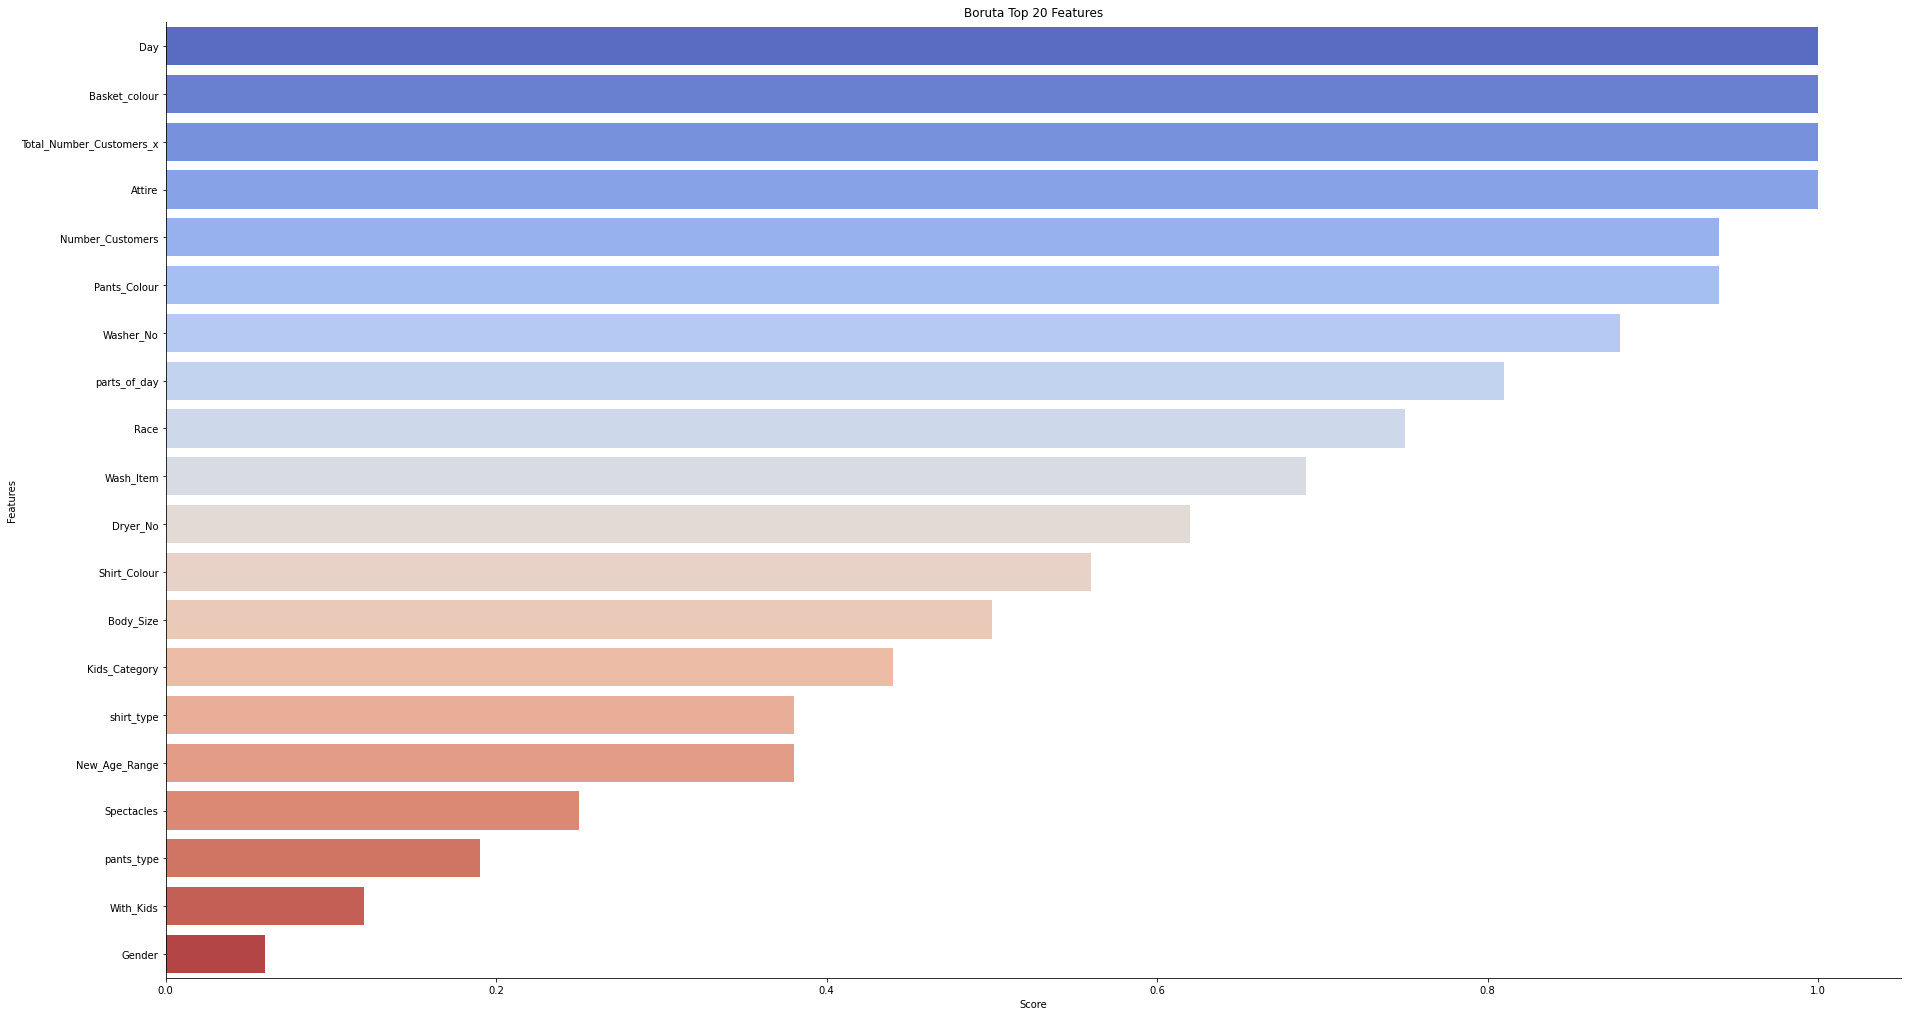

In [ ]:
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[0:20], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("Boruta Top 20 Features")

**Boruta feature selection have been applied to the dataset to find the best on predicting the basket size of the customers used. The bar chart above showed the scoring of different features in the dataset.**

# Classification

## Question 12: How well performed are the classification models in predicting attributes called ‘parts_of_day’ and ‘Basket_Size’?

## Random Forest Classifier (parts_of_day)

In [ ]:
y = qf7['parts_of_day']
X = qf7.drop(columns=['Basket_Size','parts_of_day','Body_Size','New_Age_Range','Dryer_No', 'Gender', 'Spectacles'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
#Random Forest Classifier
rfr = RandomForestClassifier()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.42      0.46        36
           1       0.68      0.61      0.64        46
           2       0.72      0.82      0.77        80

    accuracy                           0.67       162
   macro avg       0.64      0.62      0.62       162
weighted avg       0.66      0.67      0.66       162



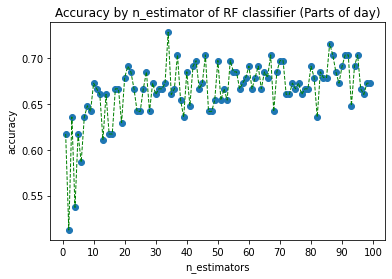

In [ ]:
n_estimators_range = range(1,100)
scores = []

# your codes here...
for n_estimators in n_estimators_range:
    rfr = RandomForestClassifier(n_estimators = n_estimators)
    rfr.fit(X_train, y_train)
    scores.append(rfr.score(X_test, y_test))

plt.figure()
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.title('Accuracy by n_estimator of RF classifier (Parts of day)')
plt.scatter(n_estimators_range, scores)
plt.xticks([0,10,20,30,40,50,60,70,80,90,100]);
plt.plot(n_estimators_range, scores, color='green', linestyle='dashed', linewidth=1, markersize=5)

## Decision Tree Classifier (parts_of_day)

In [ ]:
#Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred=dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68        36
           1       0.78      0.85      0.81        46
           2       0.83      0.80      0.82        80

    accuracy                           0.78       162
   macro avg       0.77      0.77      0.77       162
weighted avg       0.78      0.78      0.78       162



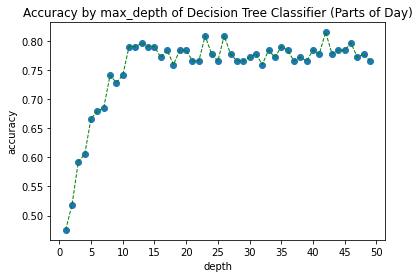

In [ ]:
depth_range = range(1,50)
scores = []

# your codes here...
for depth in depth_range:
    dt = DecisionTreeClassifier(max_depth = depth)
    dt.fit(X_train, y_train)
    scores.append(dt.score(X_test, y_test))

plt.figure()
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.title('Accuracy by max_depth of Decision Tree Classifier (Parts of Day)')
plt.scatter(depth_range, scores)
plt.xticks([0,5,10,15,20,25,30,35,40,45,50]);
plt.plot(depth_range, scores, color='green', linestyle='dashed', linewidth=1, markersize=5)

**Different scatter plots has been plotted for visualizing the accuracy of parameters tuning on different classifiers used on predicting the parts of day of customer visiting the laundry shop.**

## KNeighbors Classifier (Basket_Size)

In [ ]:
y = qf7['Basket_Size']
X = qf7.drop(columns=['Basket_Size','Kids_Category','shirt_type','New_Age_Range','Spectacles', 'pants_type', 'With_Kids', 'Gender', 'Rain Type'])

smt = SMOTE(sampling_strategy="minority", random_state=10, k_neighbors=5)
X_res, y_res = smt.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [ ]:
#Random Forest Classifier
smoted_knn = KNeighborsClassifier()
smoted_knn.fit(X_train, y_train)
y_pred = smoted_knn.predict(X_test)

print('score: ', accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

score:  0.8461538461538461
              precision    recall  f1-score   support

           0       0.99      0.69      0.81       146
           1       0.77      0.99      0.87       153

    accuracy                           0.85       299
   macro avg       0.88      0.84      0.84       299
weighted avg       0.88      0.85      0.84       299



## Naive Bayes (Basket_Size)

In [ ]:
#Naive Bayes
smoted_nb = GaussianNB()
smoted_nb.fit(X_train, y_train)
y_pred = smoted_nb.predict(X_test)

print('score: ', accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

score:  0.7290969899665551
              precision    recall  f1-score   support

           0       0.74      0.68      0.71       146
           1       0.72      0.77      0.74       153

    accuracy                           0.73       299
   macro avg       0.73      0.73      0.73       299
weighted avg       0.73      0.73      0.73       299



## Models Evaluation (Basket Size)

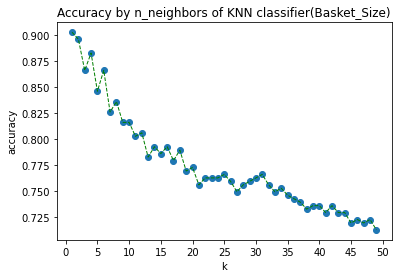

In [ ]:
### KNN
k_range = range(1,50)
scores = []

# your codes here...
for k in k_range:
    smoted_knn = KNeighborsClassifier(n_neighbors = k)
    smoted_knn.fit(X_train, y_train)
    scores.append(smoted_knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Accuracy by n_neighbors of KNN classifier(Basket_Size)')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20,25,30,35,40,45,50]);
plt.plot(k_range, scores, color='green', linestyle='dashed', linewidth=1, markersize=5)

**A scatter plot has been plotted for visualizing the accuracy of using different depth as parameter for KNN classifier on predicting the basket size used by the customer. We did not plot the accuracy scatter plot for naive bayes classifier because we did not tune the parameters of it.**

In [ ]:
# Calculate AUC
prob_knn = smoted_knn.predict_proba(X_test)
prob_knn = prob_knn[:,1]

auc_knn = roc_auc_score(y_test, prob_knn)
print('AUC: %.2f' % auc_knn)

AUC: 0.79


In [ ]:
prob_NB = smoted_nb.predict_proba(X_test)
prob_NB = prob_NB[:, 1]

auc_NB= roc_auc_score(y_test, prob_NB)
print('AUC: %.2f' % auc_NB)

AUC: 0.78


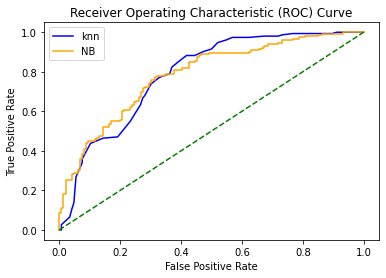

In [ ]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, prob_knn) 
fpr_NB, tpr_NB, thresholds_NB = roc_curve(y_test, prob_NB) 

plt.plot(fpr_knn, tpr_knn, color='blue', label='knn') 
plt.plot(fpr_NB, tpr_NB, color='orange', label='NB') 
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

**We  plotted a ROC graph for evaluating the classifier models on predicting the class. The result has been shown in the graph above.**

# Regression

## Question 13: How well performed are the regression models in predicting attributes called ‘Number_Customers’?

In [ ]:
reg = q8b.copy()
reg

,Date,Hour,Number_Customers
0,2015-10-19,20,3
1,2015-10-19,21,2
2,2015-10-19,23,2
3,2015-10-20,0,3
4,2015-10-20,1,1
...,...,...,...
208,2015-12-09,16,2
209,2015-12-09,17,4
210,2015-12-09,18,1
211,2015-12-09,19,1


In [ ]:
temp2 = pd.DataFrame()
for d in reg['Date'].unique():
  temp = reg[reg['Date']==d]
  temp.index = temp['Hour']
  temp = temp.reindex(np.arange(0, 24)).fillna(0)
  temp.drop(columns=['Hour','Date'],inplace=True)
  temp.reset_index(inplace=True)
  temp2 = pd.concat([temp2,temp],axis=0)

temp2

,Hour,Number_Customers
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
...,...,...
19,19,1.0
20,20,6.0
21,21,0.0
22,22,0.0


In [ ]:
cus = pd.DataFrame()
cus['Number_Customers'] = temp2['Number_Customers']

for i in range(1,25):
  cus["num_cus-{0}".format(i)] = cus['Number_Customers'].shift(i)

cus = cus.fillna(0)
cus

,Number_Customers,num_cus-1,num_cus-2,num_cus-3,num_cus-4,num_cus-5,num_cus-6,num_cus-7,num_cus-8,num_cus-9,num_cus-10,num_cus-11,num_cus-12,num_cus-13,num_cus-14,num_cus-15,num_cus-16,num_cus-17,num_cus-18,num_cus-19,num_cus-20,num_cus-21,num_cus-22,num_cus-23,num_cus-24
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,1.0,1.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,6.0,1.0,1.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,0.0,6.0,1.0,1.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.0,0.0,6.0,1.0,1.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Random Forest Regressor

In [ ]:
y = cus['Number_Customers']
X = cus.drop(columns = ['Number_Customers'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_test_pred = rfr.predict(X_test)
print(math.sqrt(mean_squared_error(y_test, y_test_pred)))
print(y_test)
print(pd.DataFrame(y_test_pred))

2.4934772364841677
4     0.0
4     0.0
3     0.0
5     0.0
8     0.0
     ... 
19    0.0
3     0.0
20    0.0
22    5.0
8     0.0
Name: Number_Customers, Length: 116, dtype: float64
            0
0    0.990000
1    0.504178
2    1.020000
3    0.214767
4    1.120000
..        ...
111  0.166471
112  0.564021
113  0.564021
114  3.230000
115  1.730000

[116 rows x 1 columns]


## Decision Tree Regressor

In [ ]:
regressor = DecisionTreeRegressor(max_depth = 10)
regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_test) 
print(math.sqrt(mean_squared_error(y_test, y_predict)))
print(y_test)
print(pd.DataFrame(y_predict))

2.9098182682885585
4     0.0
4     0.0
3     0.0
5     0.0
8     0.0
     ... 
19    0.0
3     0.0
20    0.0
22    5.0
8     0.0
Name: Number_Customers, Length: 116, dtype: float64
            0
0    5.000000
1    0.246154
2    0.000000
3    0.246154
4    1.000000
..        ...
111  0.246154
112  0.246154
113  0.246154
114  4.857143
115  2.000000

[116 rows x 1 columns]


## Lasso Regression

In [ ]:
clf = linear_model.Lasso(alpha=0.9)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test) 
print(math.sqrt(mean_squared_error(y_test, y_predicted)))
print(y_test)
print(pd.DataFrame(y_predict))

6.4731975895993035
4     0.0
4     0.0
3     0.0
5     0.0
8     0.0
     ... 
19    0.0
3     0.0
20    0.0
22    5.0
8     0.0
Name: Number_Customers, Length: 116, dtype: float64
            0
0    5.000000
1    0.246154
2    0.000000
3    0.246154
4    1.000000
..        ...
111  0.246154
112  0.246154
113  0.246154
114  4.857143
115  2.000000

[116 rows x 1 columns]


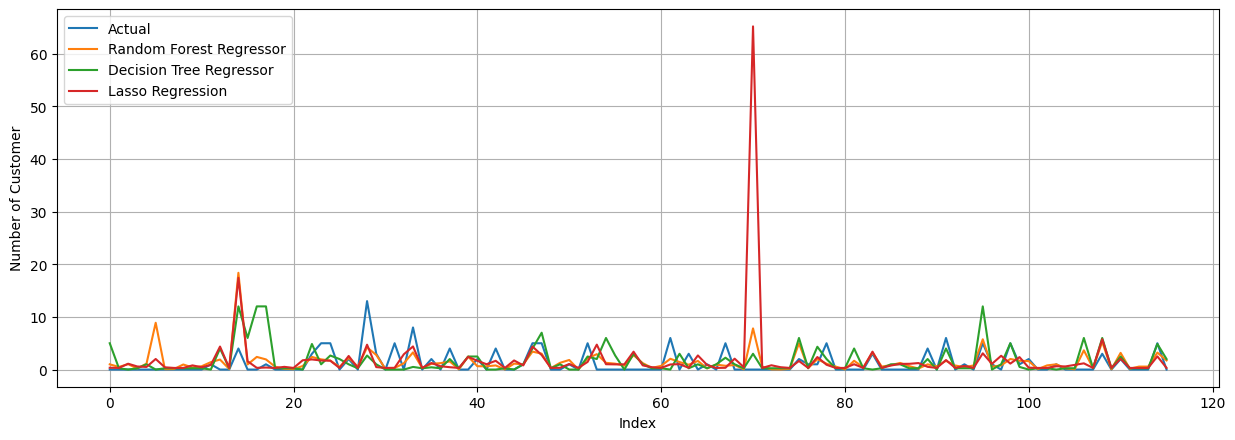

In [ ]:
fig, axes = plt.subplots(figsize=(15,5), dpi=100)
plt.plot([n for n in range(len(X_test))], y_test, label='Actual')
plt.plot([n for n in range(len(X_test))], y_test_pred, label='Random Forest Regressor')
plt.plot([n for n in range(len(X_test))], y_predict, label='Decision Tree Regressor')
plt.plot([n for n in range(len(X_test))], y_predicted, label='Lasso Regression')
plt.xlabel('Index')
plt.ylabel('Number of Customer')
plt.grid()
plt.legend(loc = 2)
plt.show()

**A subplot has been used for evaluating the precision of the regression models used. The subplot used the predicted values of the regression models to do comparison with the actual value used for testing from the dataset.**

# Clustering

In [ ]:
from sklearn import preprocessing
clustering = df5c.copy()
scaler = preprocessing.MinMaxScaler()
clustering[['Total_Number_Customers_x', 'Number_Customers']] = scaler.fit_transform(clustering[['Total_Number_Customers_x', 'Number_Customers']])

In [ ]:
clustering

,Number_Customers,Race,Gender,Body_Size,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,parts_of_day,New_Age_Range,Total_Number_Customers_x,Rain Type,Day
0,0.021277,malay,male,moderate,yes,young,big,red,casual,blue,short_sleeve,black,short,clothes,3,10,no,Evening,"(20, 30]",0.045113,Light rain,Mon
1,0.021277,indian,male,thin,no,no_kids,big,green,casual,white,short_sleeve,blue_jeans,long,clothes,6,9,no,Evening,"(30, 40]",0.045113,Light rain,Mon
2,0.021277,malay,female,moderate,no,no_kids,big,blue,casual,red,short_sleeve,black,long,clothes,4,10,no,Evening,"(20, 30]",0.045113,Light rain,Mon
3,0.010638,indian,male,thin,no,no_kids,big,black,casual,black,short_sleeve,yellow,short,clothes,5,9,no,Evening,"(50, 60]",0.045113,Light rain,Mon
4,0.010638,indian,male,moderate,no,no_kids,big,blue,casual,blue,short_sleeve,white,long,clothes,3,9,no,Evening,"(30, 40]",0.045113,Light rain,Mon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,0.053191,malay,female,moderate,no,no_kids,small,white,casual,red,long sleeve,black,long,clothes,3,10,no,Evening,"(40, 50]",0.120301,Light rain,Wed
803,0.053191,malay,male,fat,no,no_kids,big,grey,casual,white,short_sleeve,black,long,blankets,3,7,no,Evening,"(30, 40]",0.120301,Light rain,Wed
804,0.053191,malay,female,moderate,no,no_kids,big,purple,traditional,pink,long sleeve,pink,long,clothes,3,7,yes,Evening,"(50, 60]",0.120301,Light rain,Wed
805,0.053191,indian,female,moderate,no,no_kids,big,green,traditional,brown,short_sleeve,black,long,clothes,6,10,no,Evening,"(30, 40]",0.120301,Light rain,Wed


In [ ]:
!pip install kmodes

In [ ]:


categorical_columns = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21]
kproto = KPrototypes(n_clusters=3, init='Cao')
clusters = kproto.fit_predict(clustering, categorical=categorical_columns)
labels = pd.DataFrame(clusters)
labeled_clustering = pd.concat((clustering,labels),axis=1)
labeled_clustering = labeled_clustering.rename({0:'labels'},axis=1)


In [ ]:
labeled_clustering

,Number_Customers,Race,Gender,Body_Size,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,parts_of_day,New_Age_Range,Total_Number_Customers_x,Rain Type,Day,labels
0,0.021277,malay,male,moderate,yes,young,big,red,casual,blue,short_sleeve,black,short,clothes,3,10,no,Evening,"(20, 30]",0.045113,Light rain,Mon,0
1,0.021277,indian,male,thin,no,no_kids,big,green,casual,white,short_sleeve,blue_jeans,long,clothes,6,9,no,Evening,"(30, 40]",0.045113,Light rain,Mon,1
2,0.021277,malay,female,moderate,no,no_kids,big,blue,casual,red,short_sleeve,black,long,clothes,4,10,no,Evening,"(20, 30]",0.045113,Light rain,Mon,0
3,0.010638,indian,male,thin,no,no_kids,big,black,casual,black,short_sleeve,yellow,short,clothes,5,9,no,Evening,"(50, 60]",0.045113,Light rain,Mon,1
4,0.010638,indian,male,moderate,no,no_kids,big,blue,casual,blue,short_sleeve,white,long,clothes,3,9,no,Evening,"(30, 40]",0.045113,Light rain,Mon,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,0.053191,malay,female,moderate,no,no_kids,small,white,casual,red,long sleeve,black,long,clothes,3,10,no,Evening,"(40, 50]",0.120301,Light rain,Wed,0
803,0.053191,malay,male,fat,no,no_kids,big,grey,casual,white,short_sleeve,black,long,blankets,3,7,no,Evening,"(30, 40]",0.120301,Light rain,Wed,0
804,0.053191,malay,female,moderate,no,no_kids,big,purple,traditional,pink,long sleeve,pink,long,clothes,3,7,yes,Evening,"(50, 60]",0.120301,Light rain,Wed,0
805,0.053191,indian,female,moderate,no,no_kids,big,green,traditional,brown,short_sleeve,black,long,clothes,6,10,no,Evening,"(30, 40]",0.120301,Light rain,Wed,0


In [ ]:
costs = []
n_clusters = []
clusters_assigned = []
categorical_columns = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21]
for i in range(1, 10):
    try:
        kproto = KPrototypes(n_clusters= i, init='Cao')
        clusters = kproto.fit_predict(clustering, categorical=categorical_columns)
        costs.append(kproto.cost_)
        n_clusters.append(i)
        clusters_assigned.append(clusters)
    except:
        print(f"Can't cluster with {i} clusters")

layout = dict(plot_bgcolor='white',
              margin=dict(t=20, l=20, r=20, b=20),
              xaxis=dict(title='Number of Cluster',
                         linecolor='#d9d9d9',
                         showgrid=False,
                         mirror=True))

fig = go.Figure(data=go.Scatter(x=n_clusters, y=costs ), layout=layout)
fig.show()

**By using a scatter plot, we are able to find the total cluster of the dataset from the elbow criterion achieve in the graph as shown above.**